In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix,log_loss, get_scorer_names
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import pickle
import yaml

In [31]:
df = pd.read_csv("../1.Data/2.Processed/processed3.csv",index_col=0)
df

,Loan Amount,Funded Amount Investor,Term,Revolving Utilities,Recoveries,Collection Recovery Fee,Last week Pay,Total Collection Amount,Total Current Balance,Loan Status,...,Eficacia pagos respecto financiación inicial,Proporción Morosidad según financiación,Proporción Morosidad según Batch Enrolled,grado_interes_ordered,Sub Grade_ordered,Grade_ordered,verification_status_ordered,Home Ownership ordered,initial_list_status_ordered,application_type_ordered
ID,,,,,,,,,,,,,,,,,,,,,
65087372,10000,12329.36286,59,74.932551,2.498291,0.793724,49,31,311301,0,...,0.090884,0.081828,0.095068,5,36,16,0,2,0.088901,0.092516
1450153,3609,12191.99692,59,78.297186,2.377215,0.974821,109,53,182610,0,...,0.064724,0.090536,0.105029,3,27,12,4,1,0.096714,0.092516
1969101,28276,21603.22455,59,2.073040,4.316277,1.020075,66,34,89801,0,...,0.094738,0.081828,0.092179,3,26,2,4,2,0.088901,0.092516
6651430,11170,17877.15585,59,67.467951,0.107020,0.749971,39,40,9189,0,...,0.041446,0.090536,0.092275,0,37,12,4,2,0.088901,0.092516
14354669,16890,13539.92667,59,85.250761,1294.818751,0.368953,18,430,126029,0,...,0.011231,0.093986,0.087944,1,26,12,4,2,0.088901,0.092516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16164945,13601,13175.28583,59,97.779389,564.614852,0.865230,69,48,181775,1,...,0.288985,0.093986,0.087446,5,56,12,2,2,0.088901,0.092516
35182714,8323,15637.46301,59,15.690703,2.015494,1.403368,14,37,22692,0,...,0.280720,0.093986,0.099459,5,47,12,4,1,0.088901,0.092516
16435904,15897,12329.45775,59,1.500090,5.673092,1.607093,137,17,176857,0,...,0.081772,0.153846,0.104027,0,10,20,2,2,0.088901,0.092516


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67463 entries, 65087372 to 65443173
Data columns (total 28 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Loan Amount                                       67463 non-null  int64  
 1   Funded Amount Investor                            67463 non-null  float64
 2   Term                                              67463 non-null  int64  
 3   Revolving Utilities                               67463 non-null  float64
 4   Recoveries                                        67463 non-null  float64
 5   Collection Recovery Fee                           67463 non-null  float64
 6   Last week Pay                                     67463 non-null  int64  
 7   Total Collection Amount                           67463 non-null  int64  
 8   Total Current Balance                             67463 non-null  int64  
 9   Loan St

In [33]:
df.describe()

,Loan Amount,Funded Amount Investor,Term,Revolving Utilities,Recoveries,Collection Recovery Fee,Last week Pay,Total Collection Amount,Total Current Balance,Loan Status,...,Eficacia pagos respecto financiación inicial,Proporción Morosidad según financiación,Proporción Morosidad según Batch Enrolled,grado_interes_ordered,Sub Grade_ordered,Grade_ordered,verification_status_ordered,Home Ownership ordered,initial_list_status_ordered,application_type_ordered
count,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,6.746300e+04,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000
mean,16848.902776,14621.799323,58.173814,52.889443,59.691578,1.125141,71.163260,146.467990,1.595739e+05,0.092510,...,0.173749,0.092510,0.092510,3.889035,37.390777,12.937254,2.494701,1.951618,0.092510,0.092510
std,8367.865726,6785.345170,3.327441,22.539450,357.026346,3.489885,43.315845,744.382233,1.390332e+05,0.289747,...,0.239998,0.012567,0.007085,2.400976,14.123201,5.130082,1.638119,1.133326,0.003896,0.000132
min,1014.000000,1114.590204,36.000000,0.005172,0.000036,0.000036,0.000000,1.000000,6.170000e+02,0.000000,...,0.000164,0.000000,0.078297,0.000000,0.000000,0.000000,0.000000,1.000000,0.088901,0.089431
25%,10012.000000,9831.684984,58.000000,38.658825,1.629818,0.476259,35.000000,24.000000,5.037900e+04,0.000000,...,0.038919,0.090536,0.087446,2.000000,27.000000,8.000000,2.000000,1.000000,0.088901,0.092516
50%,16073.000000,12793.682170,59.000000,54.082334,3.344524,0.780141,68.000000,36.000000,1.183690e+05,0.000000,...,0.094562,0.093986,0.093750,5.000000,38.000000,12.000000,2.000000,2.000000,0.088901,0.092516
75%,22106.000000,17807.594120,59.000000,69.177117,5.453727,1.070566,105.000000,46.000000,2.283750e+05,0.000000,...,0.212829,0.093986,0.096085,6.000000,48.000000,16.000000,4.000000,2.000000,0.096714,0.092516
max,35000.000000,34999.746430,59.000000,100.880050,4354.467419,166.833000,161.000000,16421.000000,1.177412e+06,1.000000,...,8.898065,0.500000,0.125000,7.000000,59.000000,20.000000,4.000000,5.000000,0.096714,0.092516


<Axes: >

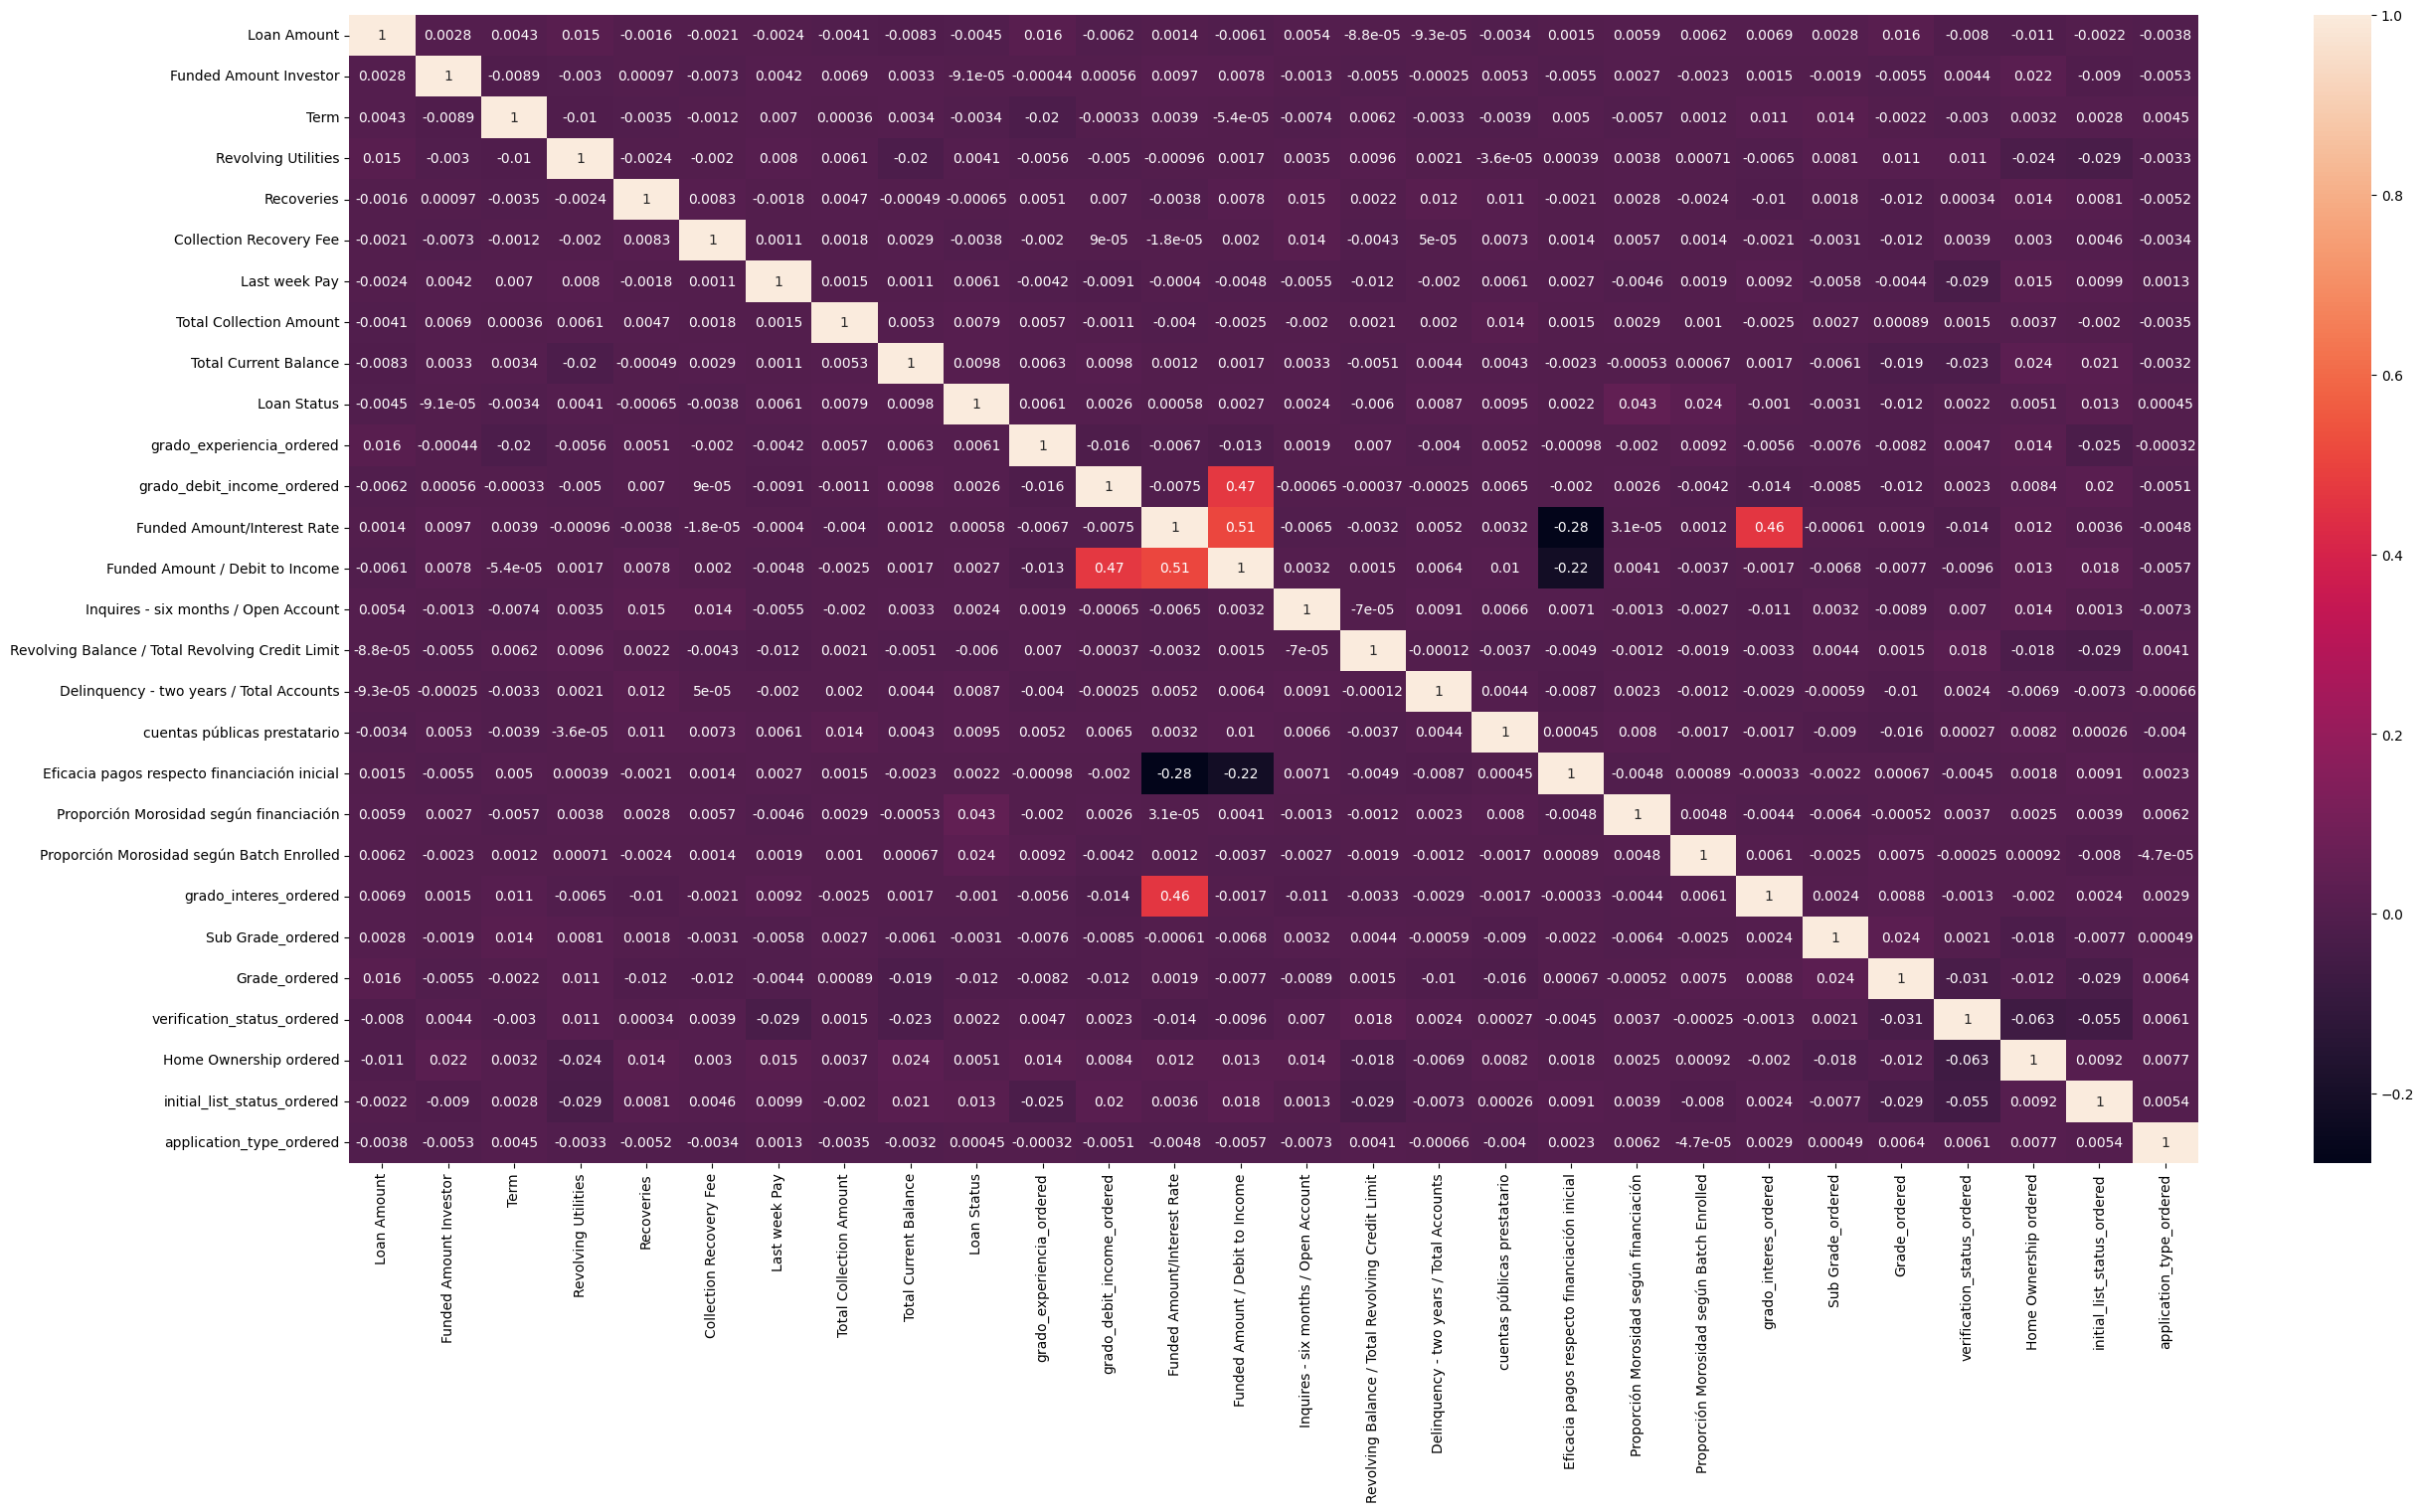

In [34]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True)

In [35]:
df.columns

Index(['Loan Amount', 'Funded Amount Investor', 'Term', 'Revolving Utilities',
       'Recoveries', 'Collection Recovery Fee', 'Last week Pay',
       'Total Collection Amount', 'Total Current Balance', 'Loan Status',
       'grado_experiencia_ordered', 'grado_debit_income_ordered',
       'Funded Amount/Interest Rate', 'Funded Amount / Debit to Income',
       'Inquires - six months / Open Account',
       'Revolving Balance / Total Revolving Credit Limit',
       'Delinquency - two years / Total Accounts',
       'cuentas públicas prestatario',
       'Eficacia pagos respecto financiación inicial',
       'Proporción Morosidad según financiación',
       'Proporción Morosidad según Batch Enrolled', 'grado_interes_ordered',
       'Sub Grade_ordered', 'Grade_ordered', 'verification_status_ordered',
       'Home Ownership ordered', 'initial_list_status_ordered',
       'application_type_ordered'],
      dtype='object')

In [36]:
X = df.drop([
       "Loan Status",'Funded Amount/Interest Rate',"Term"],axis=1)
y = df["Loan Status"]

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67463 entries, 65087372 to 65443173
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Loan Amount                                       67463 non-null  int64  
 1   Funded Amount Investor                            67463 non-null  float64
 2   Revolving Utilities                               67463 non-null  float64
 3   Recoveries                                        67463 non-null  float64
 4   Collection Recovery Fee                           67463 non-null  float64
 5   Last week Pay                                     67463 non-null  int64  
 6   Total Collection Amount                           67463 non-null  int64  
 7   Total Current Balance                             67463 non-null  int64  
 8   grado_experiencia_ordered                         67463 non-null  int64  
 9   grado_d

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(53970, 25)
(53970,)
(13493, 25)
(13493,)


In [39]:
under_sampler = RandomUnderSampler(random_state=42)
X_under, y_under = under_sampler.fit_resample(X_train,y_train)

In [40]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under,y_under,test_size=0.2,random_state=42)
print(X_train_under.shape)
print(y_train_under.shape)
print(X_test_under.shape)
print(y_test_under.shape)

(7988, 25)
(7988,)
(1998, 25)
(1998,)


<Axes: >

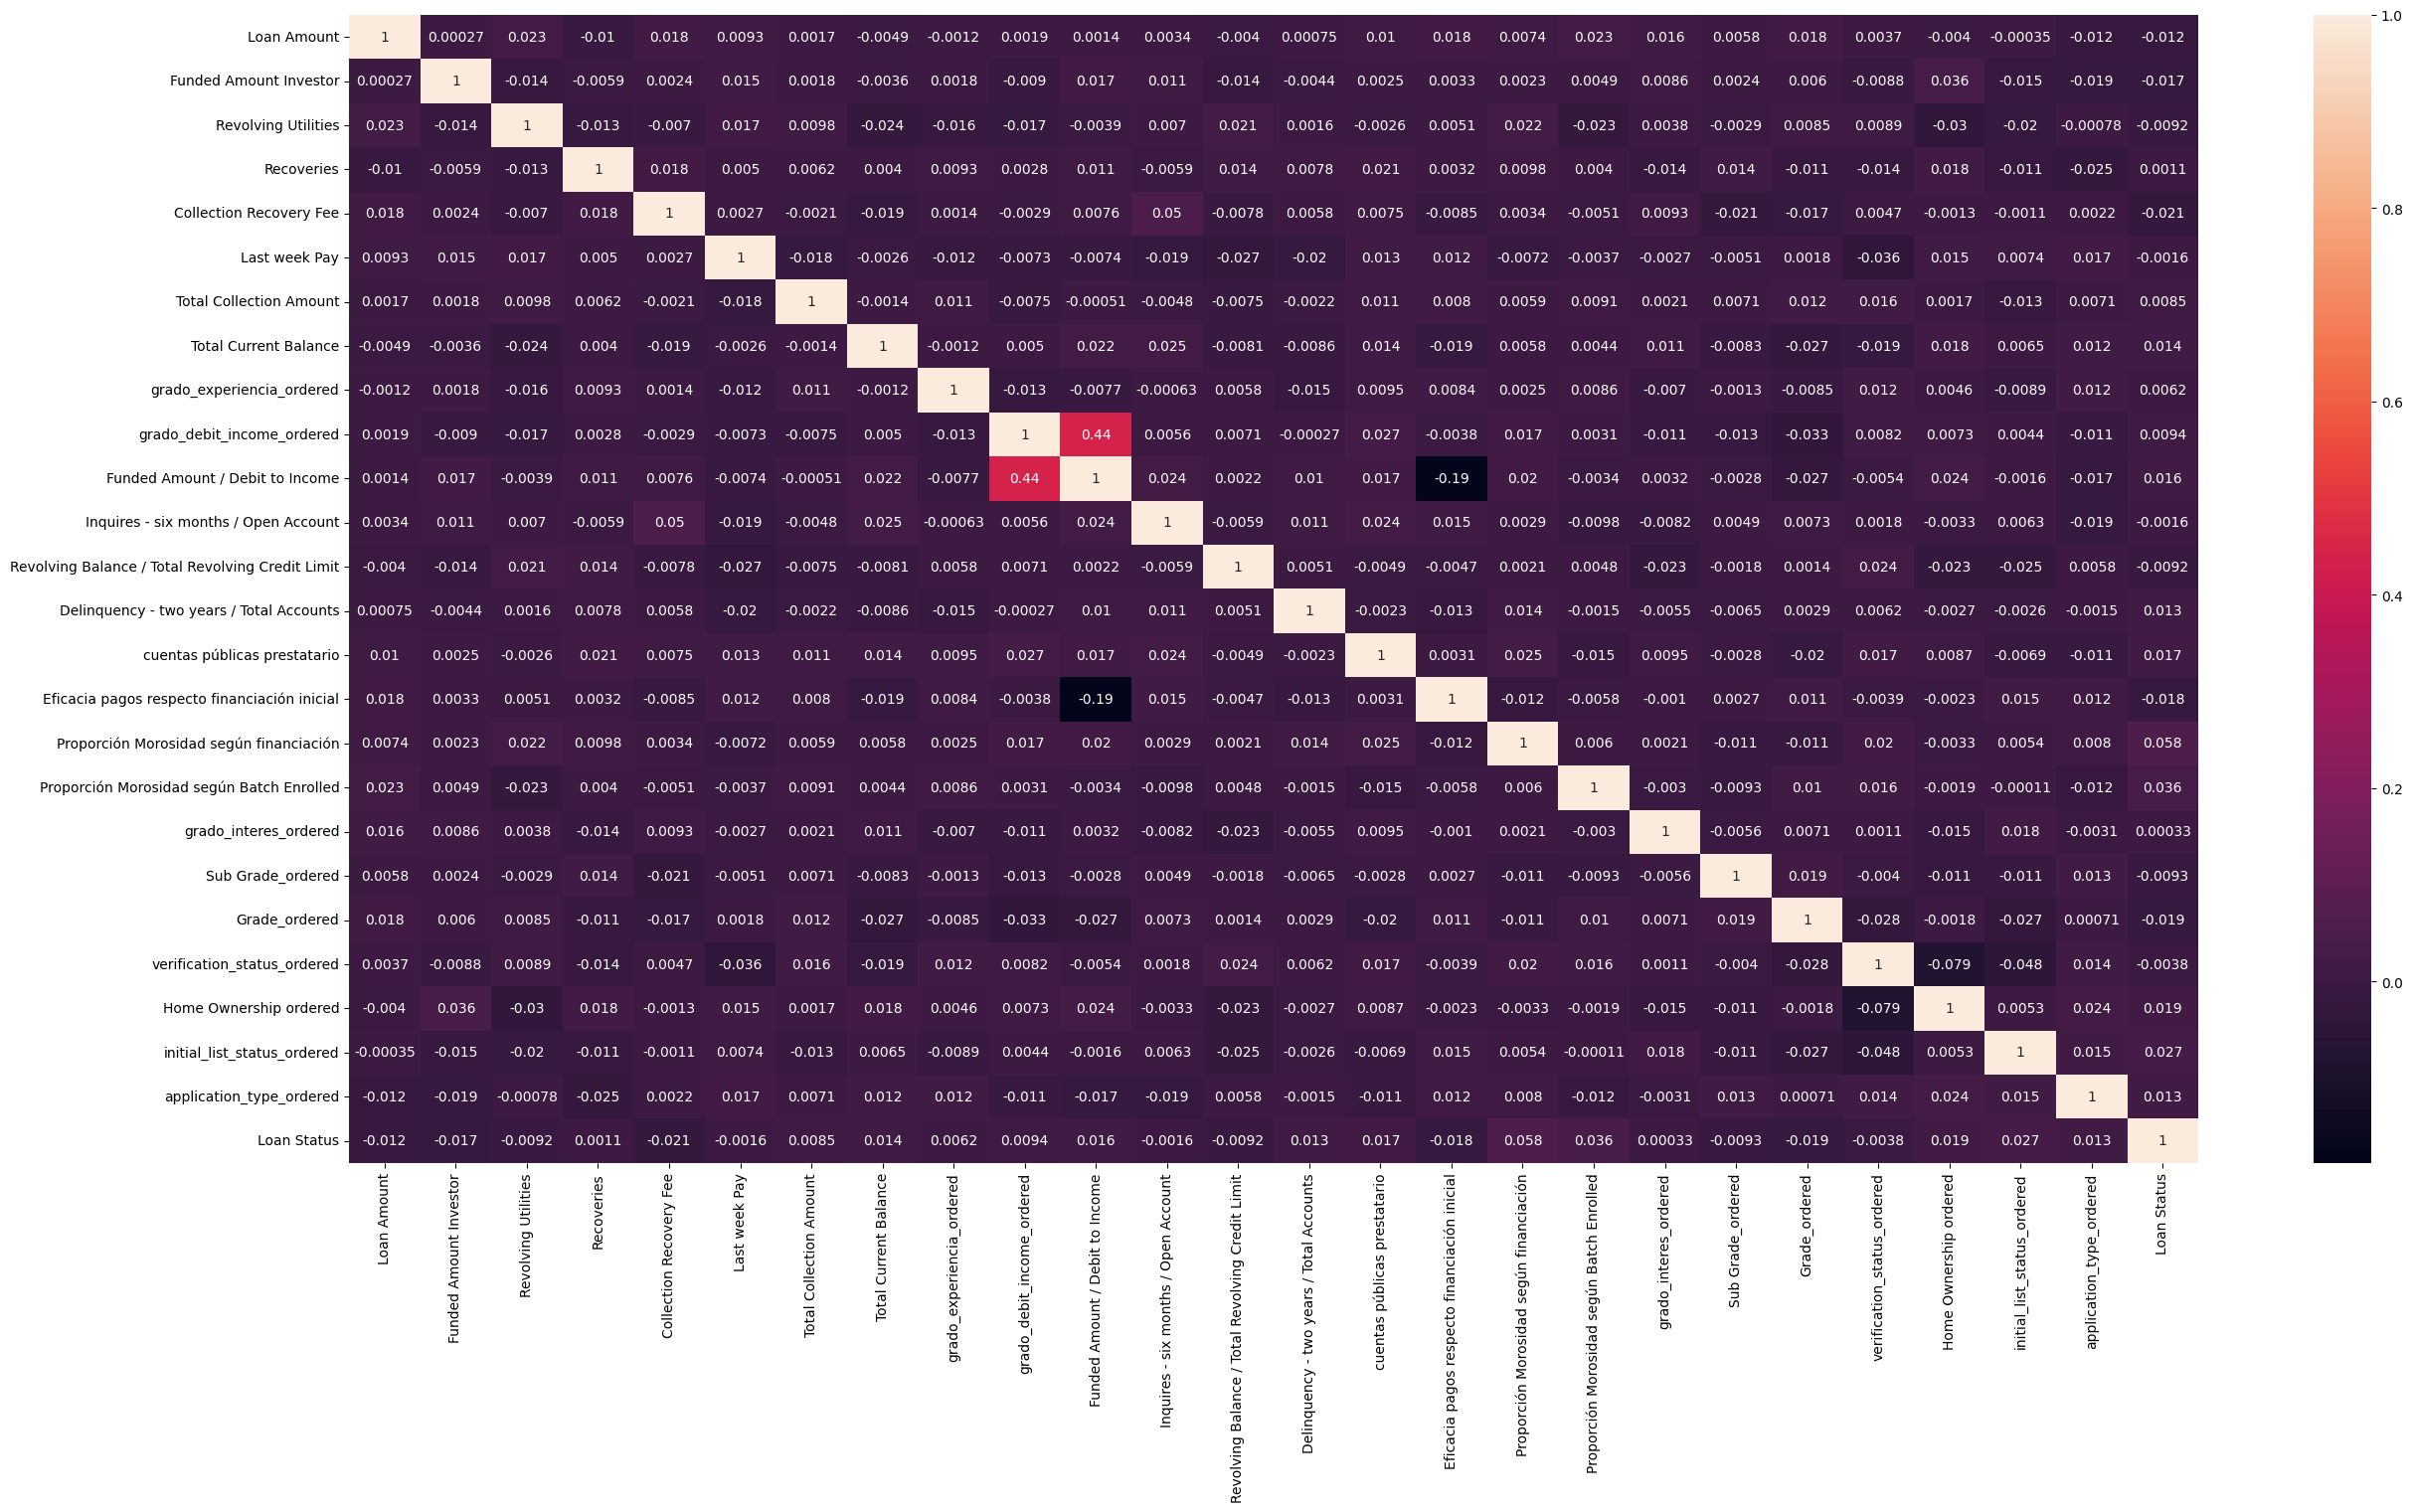

In [41]:
df_under = pd.concat([X_under,y_under],axis=1)
plt.figure(figsize=(30,15))
sns.heatmap(df_under.corr(),annot=True)

In [42]:
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

Gradient Boosting

In [43]:
pipegb = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", GradientBoostingClassifier())
])

gb_params = {
"classifier__n_estimators": [100],
'scaler' : [StandardScaler(), None],
'selectkbest__k' : np.arange(5,15),
'classifier__max_features': [3,5,6,7],
'classifier__max_depth': [5,6,7,8]} 

In [44]:
modelgb = GridSearchCV(estimator = pipegb, param_grid = gb_params, cv=3, scoring="f1",n_jobs=-1)

In [45]:
modelgb.fit(X_train_under, y_train_under)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('classifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [5, 6, 7, 8],
                         'classifier__max_features': [3, 5, 6, 7],
                         'classifier__n_estimators': [100],
                         'scaler': [StandardScaler(), None],
                         'selectkbest__k': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='f1')

In [46]:
print("modelgb best score:",modelgb.best_score_ )
print("modelgb best params:",modelgb.best_params_ )
print("modelgb best estimator:",modelgb.best_estimator_ )

modelgb best score: 0.5268665677687956
modelgb best score: {'classifier__max_depth': 5, 'classifier__max_features': 7, 'classifier__n_estimators': 100, 'scaler': None, 'selectkbest__k': 11}
modelgb best score: Pipeline(steps=[('scaler', None), ('selectkbest', SelectKBest(k=11)),
                ('classifier',
                 GradientBoostingClassifier(max_depth=5, max_features=7))])


In [47]:
y_pred_under_gb = modelgb.best_estimator_.predict(X_test_under)

In [48]:
print("modelgb train recall score", recall_score(y_test_under, y_pred_under_gb))
print("modelgb train precision_score", precision_score(y_test_under, y_pred_under_gb))
print("modelgb train accuracy_score", accuracy_score(y_test_under, y_pred_under_gb))
print("modelgb train f1_score", f1_score(y_test_under, y_pred_under_gb))
print("modelgb train log_loss", log_loss(y_test_under, y_pred_under_gb))


modelgb train recall score 0.4879032258064516
modelgb train precision_score 0.5020746887966805
modelgb train accuracy_score 0.5055055055055055
modelgb train f1_score 0.4948875255623722
modelgb train log_loss 17.82338816238626


In [49]:
print("modelgb train confusion matrix")
confusion_matrix(y_test_under, y_pred_under_gb)

modelgb train confusion matrix


array([[526, 480],
       [508, 484]], dtype=int64)

In [50]:
print("modelgb train confusion matrix")
confusion_matrix(y_test_under, y_pred_under_gb,normalize="true")

modelgb train confusion matrix


array([[0.52286282, 0.47713718],
       [0.51209677, 0.48790323]])

In [51]:
y_pred_gb = modelgb.best_estimator_.predict(X_test)

In [52]:
print("modelgb test recall score", recall_score(y_test, y_pred_gb))
print("modelgb test precision_score", precision_score(y_test, y_pred_gb))
print("modelgb test accuracy_score", accuracy_score(y_test, y_pred_gb))
print("modelgb test f1_score", f1_score(y_test, y_pred_gb))
print("modelgb test log_loss", log_loss(y_test, y_pred_gb))


modelgb test recall score 0.5120192307692307
modelgb test precision_score 0.0982774530913565
modelgb test accuracy_score 0.5203438820128956
modelgb test f1_score 0.16490322580645161
modelgb test log_loss 17.28855886269667


In [53]:
print("modelgb test confusion matrix")
confusion_matrix(y_test, y_pred_gb)

modelgb test confusion matrix


array([[6382, 5863],
       [ 609,  639]], dtype=int64)

In [54]:
print("modelgb test confusion matrix")
confusion_matrix(y_test, y_pred_gb,normalize="true")

modelgb test confusion matrix


array([[0.52119232, 0.47880768],
       [0.48798077, 0.51201923]])

In [55]:
with open("ModeloGB.pkl", 'wb') as archivo_salida:
    pickle.dump(modelgb.best_estimator_, archivo_salida)

In [56]:
with open("ModeloGB.yaml", "w") as f:
    yaml.dump(modelgb.best_params_, f)

Random Forest

In [57]:
piperf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", RandomForestClassifier())
])
rf_params = {
'scaler' : [StandardScaler(), None],
'selectkbest__k' : np.arange(5,15),
'classifier__max_features': [3,5,6,7],
'classifier__max_depth': [2,3,4,5,6]
}

In [58]:
modelrf = GridSearchCV(estimator = piperf, param_grid = rf_params, cv=3, scoring="f1",n_jobs=-1)

In [59]:
modelrf.fit(X_train_under, y_train_under)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [2, 3, 4, 5, 6],
                         'classifier__max_features': [3, 5, 6, 7],
                         'scaler': [StandardScaler(), None],
                         'selectkbest__k': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='f1')

In [60]:
print("modelrf best score:",modelrf.best_score_ )
print("modelrf best params:",modelrf.best_params_ )
print("modelrf best estimator:",modelrf.best_estimator_ )

modelrf best score: 0.5463292062819083
modelrf best score: {'classifier__max_depth': 2, 'classifier__max_features': 6, 'scaler': None, 'selectkbest__k': 10}
modelrf best score: Pipeline(steps=[('scaler', None), ('selectkbest', SelectKBest()),
                ('classifier',
                 RandomForestClassifier(max_depth=2, max_features=6))])


In [61]:
y_pred_under_rf = modelrf.best_estimator_.predict(X_test_under)

In [62]:
print("modelrf train recall score", recall_score(y_test_under, y_pred_under_rf))
print("modelrf train precision_score", precision_score(y_test_under, y_pred_under_rf))
print("modelrf train accuracy_score", accuracy_score(y_test_under, y_pred_under_rf))
print("modelrf train f1_score", f1_score(y_test_under, y_pred_under_rf))
print("modelrf train log_loss", log_loss(y_test_under, y_pred_under_rf))


modelrf train recall score 0.6512096774193549
modelrf train precision_score 0.5159744408945687
modelrf train accuracy_score 0.5235235235235235
modelrf train f1_score 0.5757575757575758
modelrf train log_loss 17.173952966185947


In [63]:
print("modelrf train confusion matrix")
confusion_matrix(y_test_under, y_pred_under_rf)


modelrf train confusion matrix


array([[400, 606],
       [346, 646]], dtype=int64)

In [64]:
print("modelrf train confusion matrix")
confusion_matrix(y_test_under, y_pred_under_rf,normalize="true")

modelrf train confusion matrix


array([[0.39761431, 0.60238569],
       [0.34879032, 0.65120968]])

In [65]:
y_pred_rf = modelrf.best_estimator_.predict(X_test)

In [66]:
print("modelrf test recall score", recall_score(y_test, y_pred_rf))
print("modelrf test precision_score", precision_score(y_test, y_pred_rf))
print("modelrf test accuracy_score", accuracy_score(y_test, y_pred_rf))
print("modelrf test f1_score", f1_score(y_test, y_pred_rf))
print("modelrf test log_loss", log_loss(y_test, y_pred_rf))


modelrf test recall score 0.6546474358974359
modelrf test precision_score 0.09787947765664311
modelrf test accuracy_score 0.4099903653746387
modelrf test f1_score 0.1702970297029703
modelrf test log_loss 21.266102766676173


In [67]:
print("modelrf test confusion matrix")
confusion_matrix(y_test, y_pred_rf)


modelrf test confusion matrix


array([[4715, 7530],
       [ 431,  817]], dtype=int64)

In [68]:
print("modelrf test confusion matrix")
confusion_matrix(y_test, y_pred_rf,normalize="true")

modelrf test confusion matrix


array([[0.38505512, 0.61494488],
       [0.34535256, 0.65464744]])

In [69]:
with open("ModeloRF.pkl", 'wb') as archivo_salida:
    pickle.dump(modelrf.best_estimator_, archivo_salida)
with open("ModeloRF.yaml", "w") as f:
    yaml.dump(modelrf.best_params_, f)

BaggingClassifier

In [70]:
pipebc = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", BaggingClassifier())
])
bc_params = {
'scaler' : [StandardScaler(), None],
'selectkbest__k' : np.arange(5,15),
'classifier__max_features': [3,4,5,6],
'classifier__n_estimators': [100,125,150]}

In [71]:
modelBC = GridSearchCV(estimator = pipebc, param_grid = bc_params, cv=3, scoring="f1",n_jobs=-1)

In [72]:
modelBC.fit(X_train_under, y_train_under)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('classifier', BaggingClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_features': [3, 4, 5, 6],
                         'classifier__n_estimators': [100, 125, 150],
                         'scaler': [StandardScaler(), None],
                         'selectkbest__k': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='f1')

In [73]:
print("modelBC best score:",modelBC.best_score_ )
print("modelBC best params:",modelBC.best_params_ )
print("modelBC best estimator:",modelBC.best_estimator_ )

modelBC best score: 0.5212762128253797
modelBC best score: {'classifier__max_features': 5, 'classifier__n_estimators': 125, 'scaler': StandardScaler(), 'selectkbest__k': 14}
modelBC best score: Pipeline(steps=[('scaler', StandardScaler()),
                ('selectkbest', SelectKBest(k=14)),
                ('classifier',
                 BaggingClassifier(max_features=5, n_estimators=125))])


In [74]:
y_pred_under_bc = modelBC.best_estimator_.predict(X_test_under)

In [75]:
print("modelBC train recall score", recall_score(y_test_under, y_pred_under_bc))
print("modelBC train precision_score", precision_score(y_test_under, y_pred_under_bc))
print("modelBC train accuracy_score", accuracy_score(y_test_under, y_pred_under_bc))
print("modelBC train f1_score", f1_score(y_test_under, y_pred_under_bc))
print("modelBC train log_loss", log_loss(y_test_under, y_pred_under_bc))

modelBC train recall score 0.5100806451612904
modelBC train precision_score 0.49510763209393344
modelBC train accuracy_score 0.4984984984984985
modelBC train f1_score 0.5024826216484607
modelBC train log_loss 18.07594629424193


In [76]:
print("modelBC train confusion matrix")
confusion_matrix(y_test_under, y_pred_under_bc)


modelBC train confusion matrix


array([[490, 516],
       [486, 506]], dtype=int64)

In [77]:
print("modelBC train confusion matrix")
confusion_matrix(y_test_under, y_pred_under_bc,normalize="true")

modelBC train confusion matrix


array([[0.48707753, 0.51292247],
       [0.48991935, 0.51008065]])

In [78]:
y_pred_bc = modelBC.best_estimator_.predict(X_test)

In [79]:
print("modelBC test recall score", recall_score(y_test, y_pred_bc))
print("modelBC test precision_score", precision_score(y_test, y_pred_bc))
print("modelBC test accuracy_score", accuracy_score(y_test, y_pred_bc))
print("modelBC test f1_score", f1_score(y_test, y_pred_bc))
print("modelBC test log_loss", log_loss(y_test, y_pred_bc))


modelBC test recall score 0.4983974358974359
modelBC test precision_score 0.09380183984316091
modelBC test accuracy_score 0.5082635440598829
modelBC test f1_score 0.15788805686000762
modelBC test log_loss 17.723978376698458


In [80]:
print("modelBC test confusion matrix")
confusion_matrix(y_test, y_pred_bc)


modelBC test confusion matrix


array([[6236, 6009],
       [ 626,  622]], dtype=int64)

In [81]:
print("modelBC test confusion matrix")
confusion_matrix(y_test, y_pred_bc,normalize="true")

modelBC test confusion matrix


array([[0.50926909, 0.49073091],
       [0.50160256, 0.49839744]])

In [82]:
with open("modelBC.pkl", 'wb') as archivo_salida:
    pickle.dump(modelBC.best_estimator_, archivo_salida)
with open("modelBC.yaml", "w") as f:
    yaml.dump(modelBC.best_params_, f)

AdaBoost

In [83]:
pipeab = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", AdaBoostClassifier())
])
ab_params = {
'scaler' : [StandardScaler(), None],
'selectkbest__k' : np.arange(5,15),
'classifier__learning_rate': [0.1,0.3,0.5,1],
'classifier__n_estimators': [100,125,150]}

In [84]:
modelAB = GridSearchCV(estimator = pipeab, param_grid = ab_params, cv=5, scoring="f1",n_jobs=-1)

In [85]:
modelAB.fit(X_train_under, y_train_under)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('classifier', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.1, 0.3, 0.5, 1],
                         'classifier__n_estimators': [100, 125, 150],
                         'scaler': [StandardScaler(), None],
                         'selectkbest__k': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='f1')

In [86]:
print("modelAB best score:",modelAB.best_score_ )
print("modelAB best params:",modelAB.best_params_ )
print("modelAB best estimator:",modelAB.best_estimator_ )

modelAB best score: 0.5172946454642868
modelAB best score: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 125, 'scaler': StandardScaler(), 'selectkbest__k': 8}
modelAB best score: Pipeline(steps=[('scaler', StandardScaler()), ('selectkbest', SelectKBest(k=8)),
                ('classifier',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=125))])


In [87]:
y_pred_under_ab = modelAB.best_estimator_.predict(X_test_under)

In [88]:
print("modelAB train recall score", recall_score(y_test_under, y_pred_under_ab))
print("modelAB train precision_score", precision_score(y_test_under, y_pred_under_ab))
print("modelAB train accuracy_score", accuracy_score(y_test_under, y_pred_under_ab))
print("modelAB train f1_score", f1_score(y_test_under, y_pred_under_ab))
print("modelAB train log_loss", log_loss(y_test_under, y_pred_under_ab))

modelAB train recall score 0.5171370967741935
modelAB train precision_score 0.5140280561122245
modelAB train accuracy_score 0.5175175175175175
modelAB train f1_score 0.5155778894472363
modelAB train log_loss 17.390431364919383


In [89]:
print("modelAB train confusion matrix")
confusion_matrix(y_test_under, y_pred_under_ab)


modelAB train confusion matrix


array([[521, 485],
       [479, 513]], dtype=int64)

In [90]:
print("modelAB train confusion matrix")
confusion_matrix(y_test_under, y_pred_under_ab,normalize="true")

modelAB train confusion matrix


array([[0.51789264, 0.48210736],
       [0.4828629 , 0.5171371 ]])

In [91]:
y_pred_ab = modelAB.best_estimator_.predict(X_test)

In [92]:
print("modelAB test recall score", recall_score(y_test, y_pred_ab))
print("modelAB test precision_score", precision_score(y_test, y_pred_ab))
print("modelAB test accuracy_score", accuracy_score(y_test, y_pred_ab))
print("modelAB test f1_score", f1_score(y_test, y_pred_ab))
print("modelAB test log_loss", log_loss(y_test, y_pred_ab))


modelAB test recall score 0.5352564102564102
modelAB test precision_score 0.10184479341363013
modelAB test accuracy_score 0.5204179945156748
modelAB test f1_score 0.17112847444600998
modelAB test log_loss 17.285887577334698


In [93]:
print("modelAB test confusion matrix")
confusion_matrix(y_test, y_pred_ab)


modelAB test confusion matrix


array([[6354, 5891],
       [ 580,  668]], dtype=int64)

In [94]:
print("modelAB test confusion matrix")
confusion_matrix(y_test, y_pred_ab,normalize="true")

modelAB test confusion matrix


array([[0.51890568, 0.48109432],
       [0.46474359, 0.53525641]])

In [95]:
with open("modelAB.pkl", 'wb') as archivo_salida:
    pickle.dump(modelAB.best_estimator_, archivo_salida)
with open("modelAB.yaml", "w") as f:
    yaml.dump(modelAB.best_params_, f)

KNeighborsClassifier

In [96]:
pipeknn = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", KNeighborsClassifier())
])
knn_params = {
'scaler' : [StandardScaler(), None],
'selectkbest__k' : np.arange(5,15),
"classifier__n_neighbors": [3,5,7,9],
'classifier__weights': ['uniform', 'distance'],
'classifier__p': [1, 2]}

In [97]:
modelknn = GridSearchCV(estimator = pipeknn, param_grid = knn_params, cv=5, scoring="f1",n_jobs=-1)

In [98]:
modelknn.fit(X_train_under, y_train_under)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__n_neighbors': [3, 5, 7, 9],
                         'classifier__p': [1, 2],
                         'classifier__weights': ['uniform', 'distance'],
                         'scaler': [StandardScaler(), None],
                         'selectkbest__k': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='f1')

In [99]:
print("modelknn best score:",modelknn.best_score_ )
print("modelknn best params:",modelknn.best_params_ )
print("modelknn best estimator:",modelknn.best_estimator_ )

modelknn best score: 0.5180885932247404
modelknn best score: {'classifier__n_neighbors': 5, 'classifier__p': 1, 'classifier__weights': 'distance', 'scaler': None, 'selectkbest__k': 11}
modelknn best score: Pipeline(steps=[('scaler', None), ('selectkbest', SelectKBest(k=11)),
                ('classifier', KNeighborsClassifier(p=1, weights='distance'))])


In [100]:
y_pred_under_knn = modelknn.best_estimator_.predict(X_test_under)

In [101]:
print("modelknn train recall score", recall_score(y_test_under, y_pred_under_knn))
print("modelknn train precision_score", precision_score(y_test_under, y_pred_under_knn))
print("modelknn train accuracy_score", accuracy_score(y_test_under, y_pred_under_knn))
print("modelknn train f1_score", f1_score(y_test_under, y_pred_under_knn))
print("modelknn train log_loss", log_loss(y_test_under, y_pred_under_knn))

modelknn train recall score 0.5171370967741935
modelknn train precision_score 0.5024485798237023
modelknn train accuracy_score 0.506006006006006
modelknn train f1_score 0.5096870342771983
modelknn train log_loss 17.805348295825137


In [102]:
print("modelknn train confusion matrix")
confusion_matrix(y_test_under, y_pred_under_knn)


modelknn train confusion matrix


array([[498, 508],
       [479, 513]], dtype=int64)

In [103]:
print("modelknn train confusion matrix")
confusion_matrix(y_test_under, y_pred_under_knn,normalize="true")

modelknn train confusion matrix


array([[0.49502982, 0.50497018],
       [0.4828629 , 0.5171371 ]])

In [104]:
y_pred_knn = modelknn.best_estimator_.predict(X_test)

In [105]:
print("modelknn test recall score", recall_score(y_test, y_pred_knn))
print("modelknn test precision_score", precision_score(y_test, y_pred_knn))
print("modelknn test accuracy_score", accuracy_score(y_test, y_pred_knn))
print("modelknn test f1_score", f1_score(y_test, y_pred_knn))
print("modelknn test log_loss", log_loss(y_test, y_pred_knn))


modelknn test recall score 0.4791666666666667
modelknn test precision_score 0.08843537414965986
modelknn test accuracy_score 0.4949974060624027
modelknn test f1_score 0.14931335830212233
modelknn test log_loss 18.202138456491827


In [106]:
print("modelknn test confusion matrix")
confusion_matrix(y_test, y_pred_knn)

modelknn test confusion matrix


array([[6081, 6164],
       [ 650,  598]], dtype=int64)

In [107]:
print("modelknn test confusion matrix")
confusion_matrix(y_test, y_pred_knn,normalize="true")

modelknn test confusion matrix


array([[0.49661086, 0.50338914],
       [0.52083333, 0.47916667]])

In [108]:
with open("modelknn.pkl", 'wb') as archivo_salida:
    pickle.dump(modelknn.best_estimator_, archivo_salida)
with open("modelknn.yaml", "w") as f:
    yaml.dump(modelknn.best_params_, f)

XGBoost

In [132]:
pipexgb = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", XGBClassifier())
])

xgb_params = {
    'selectkbest__k': np.arange(5, 15),
    'classifier__learning_rate': [0.1,0.5,0.7],
    'classifier__max_depth': np.arange(4,9),
    'classifier__max_delta_step': [2,5,6],
    "classifier__objective": ['binary:logistic']
}

In [133]:
modelxgb = GridSearchCV(estimator=pipexgb, param_grid=xgb_params, cv=3, scoring="f1", n_jobs=-1)

In [134]:
modelxgb.fit(X_train_under, y_train_under)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=Non...
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.1, 0.5, 0.7],
                         'classifier__max_delta_step': [2, 4, 5, 6, 7],
                         'classifier__max_depth': array([4, 5, 6, 7, 8]),
                         'classifier__objective': ['binary:logistic'],
                         'classifier__reg_alpha': [0.01, 0, 1, 0.5],
                         'classifier__reg_lambda': [0.01, 0.1, 0.5],
                         'selectkbest__k': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='f1')

In [135]:
print("modelxgb best score:",modelxgb.best_score_ )
print("modelxgb best params:",modelxgb.best_params_ )
print("modelxgb best estimator:",modelxgb.best_estimator_ )

modelxgb best score: 0.5241369597148894
modelxgb best params: {'classifier__learning_rate': 0.7, 'classifier__max_delta_step': 2, 'classifier__max_depth': 6, 'classifier__objective': 'binary:logistic', 'classifier__reg_alpha': 0.01, 'classifier__reg_lambda': 0.5, 'selectkbest__k': 13}
modelxgb best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('selectkbest', SelectKBest(k=13)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning

In [136]:
y_pred_under_xgb = modelxgb.best_estimator_.predict(X_test_under)

In [137]:
print("modelxgb train recall score", recall_score(y_test_under, y_pred_under_xgb))
print("modelxgb train precision_score", precision_score(y_test_under, y_pred_under_xgb))
print("modelxgb train accuracy_score", accuracy_score(y_test_under, y_pred_under_xgb))
print("modelxgb train f1_score", f1_score(y_test_under, y_pred_under_xgb))
print("modelxgb train log_loss", log_loss(y_test_under, y_pred_under_xgb))

modelxgb train recall score 0.5120967741935484
modelxgb train precision_score 0.508
modelxgb train accuracy_score 0.5115115115115115
modelxgb train f1_score 0.5100401606425702
modelxgb train log_loss 17.606909763652823


In [138]:
print("modelxgb train confusion matrix")
confusion_matrix(y_test_under, y_pred_under_xgb)

modelxgb train confusion matrix


array([[514, 492],
       [484, 508]], dtype=int64)

In [139]:
print("modelxgb train confusion matrix")
confusion_matrix(y_test_under, y_pred_under_xgb,normalize="true")

modelxgb train confusion matrix


array([[0.51093439, 0.48906561],
       [0.48790323, 0.51209677]])

In [140]:
y_pred_xgb = modelxgb.best_estimator_.predict(X_test)

In [141]:
print("modelxgb test recall score", recall_score(y_test, y_pred_xgb))
print("modelxgb test precision_score", precision_score(y_test, y_pred_xgb))
print("modelxgb test accuracy_score", accuracy_score(y_test, y_pred_xgb))
print("modelxgb test f1_score", f1_score(y_test, y_pred_xgb))
print("modelxgb test log_loss", log_loss(y_test, y_pred_xgb))

modelxgb test recall score 0.5
modelxgb test precision_score 0.09269162210338681
modelxgb test accuracy_score 0.5010746312902987
modelxgb test f1_score 0.15639097744360905
modelxgb test log_loss 17.98309305680995


In [142]:
print("modelxgb test confusion matrix")
confusion_matrix(y_test, y_pred_xgb)

modelxgb test confusion matrix


array([[6137, 6108],
       [ 624,  624]], dtype=int64)

In [143]:
print("modelxgb test confusion matrix")
confusion_matrix(y_test, y_pred_xgb,normalize="true")

modelxgb test confusion matrix


array([[0.50118416, 0.49881584],
       [0.5       , 0.5       ]])

In [144]:
with open("modelxgb.pkl", 'wb') as archivo_salida:
    pickle.dump(modelxgb.best_estimator_, archivo_salida)
with open("modelxgb.yaml", "w") as f:
    yaml.dump(modelxgb.best_params_, f)

PCA

In [159]:
pipe_pca = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', RandomForestClassifier())
])

params= {
    'scaler': [StandardScaler(), None],
    'pca__n_components': [5,6,7,8],
    'classifier__max_depth': [7,8,9],
    'classifier__min_samples_leaf': [7,8,9]
}

In [160]:
modelpca = GridSearchCV(pipe_pca, params, cv=3, scoring='recall',n_jobs=-1)

In [161]:
modelpca.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [7, 8, 9],
                         'classifier__min_samples_leaf': [7, 8, 9],
                         'pca__n_components': [5, 6, 7, 8],
                         'scaler': [StandardScaler(), None]},
             scoring='recall')

In [162]:
print("modelpca best score",modelpca.best_score_)
print("modelpca best params",modelpca.best_params_)
print("modelpca best estimator",modelpca.best_estimator_)

modelpca best score 0.0008011617386617388
modelpca best params {'classifier__max_depth': 7, 'classifier__min_samples_leaf': 8, 'pca__n_components': 5, 'scaler': StandardScaler()}
modelpca best estimator Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('classifier',
                 RandomForestClassifier(max_depth=7, min_samples_leaf=8))])


In [163]:
y_pred_train = modelpca.best_estimator_.predict(X_train)

In [164]:
print("modelpca train recall score", recall_score(y_train, y_pred_train))
print("modelpca train precision_score", precision_score(y_train, y_pred_train))
print("modelpca train accuracy_score", accuracy_score(y_train, y_pred_train))
print("modelpca train f1_score", f1_score(y_train, y_pred_train))
print("modelpca train log_loss", log_loss(y_train, y_pred_train))

modelpca train recall score 0.0
modelpca train precision_score 0.0
modelpca train accuracy_score 0.9074856401704651
modelpca train f1_score 0.0
modelpca train log_loss 3.3345555192118206


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [165]:
print("modelpca train confusion matrix")
confusion_matrix(y_train, y_pred_train)

modelpca train confusion matrix


array([[48977,     0],
       [ 4993,     0]], dtype=int64)

In [166]:
print("modelpca train confusion matrix")
confusion_matrix(y_train, y_pred_train,normalize="true")

modelpca train confusion matrix


array([[1., 0.],
       [1., 0.]])

In [167]:
y_pred_pca = modelpca.best_estimator_.predict(X_test)

In [168]:
print("modelpca test recall score", recall_score(y_test, y_pred_pca))
print("modelpca test precision_score", precision_score(y_test, y_pred_pca))
print("modelpca test accuracy_score", accuracy_score(y_test, y_pred_pca))
print("modelpca test f1_score", f1_score(y_test, y_pred_pca))
print("modelpca test log_loss", log_loss(y_test, y_pred_pca))

modelpca test recall score 0.0
modelpca test precision_score 0.0
modelpca test accuracy_score 0.9075075965315349
modelpca test f1_score 0.0
modelpca test log_loss 3.3337641317437345


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [169]:
print("modelpca test confusion matrix")
confusion_matrix(y_test, y_pred_pca)

modelpca test confusion matrix


array([[12245,     0],
       [ 1248,     0]], dtype=int64)

In [170]:
print("modelpca test confusion matrix")
confusion_matrix(y_test, y_pred_pca,normalize="true")

modelpca test confusion matrix


array([[1., 0.],
       [1., 0.]])

In [171]:
with open("modelpca.pkl", 'wb') as archivo_salida:
    pickle.dump(modelpca.best_estimator_, archivo_salida)
with open("modelpca.yaml", "w") as f:
    yaml.dump(modelpca.best_params_, f)